# DengAI: Predicting Disease Spread
<h4>This project is being hosted by DrivenData.org with data input from NOAA and PERISANN. The purpose of this projet is to predict where the next outbreak of Dengue fever will be. The areas of predictions are San Juan, Puerto Rico and Iquitos, Peru. The task is to predict the number of dengue cases each week (in each location) based on environmental variables describing changes in temperature, precipitation, vegetation, and more.</h4>
<h4> This project will aim to predict the next outbreak through efficient EDA, feature engineering, regression modeling, and validating results through mean square error.</h4>

## 1. Data Dictionary
 Below is a data dictionary describing what each column in the dataframe entitles. The columns will be analyzed and determined if any null values, measurement changes, imputing, removal, dropping, combining, or feature engineering are required in order for the data to be as clean and accurate as possible.

<h4>1.City and date indicators</h4><ul>
   <li><b>city</b> – City abbreviations: sj for San Juan and iq for Iquitos</li>
   <li><b>week_start_date</b> – Date given in yyyy-mm-dd format</li>

<h4>2.NOAA's GHCN daily climate data weather station measurements</h4>
   <li><b>station_max_temp_c</b> – Maximum temperature</li>
   <li><b>station_min_temp_c</b> – Minimum temperature</li>
   <li><b>station_avg_temp_c</b> – Average temperature</li>
   <li><b>station_precip_mm</b> – Total precipitation</li>
   <li><b> station_diur_temp_rng_c</b> – Diurnal temperature range

<h4>3.PERSIANN satellite precipitation measurements (0.25x0.25 degree scale)</h4>
  <li><b> precipitation_amt_mm</b> – Total precipitation</li>

<h4>4.NOAA's NCEP Climate Forecast System Reanalysis measurements (0.5x0.5 degree scale)</h4>
  <li><b> reanalysis_sat_precip_amt_mm</b> – Total precipitation</li>
  <li><b> reanalysis_dew_point_temp_k</b>– Mean dew point temperature</li>
  <li><b> reanalysis_air_temp_k</b> – Mean air temperature</li>
  <li><b> reanalysis_relative_humidity_percent</b> – Mean relative humidity</li>
  <li><b> reanalysis_specific_humidity_g_per_kg</b> – Mean specific humidity</li>
  <li><b> reanalysis_precip_amt_kg_per_m2</b> – Total precipitation</li>
  <li><b> reanalysis_max_air_temp_k</b> – Maximum air temperature</li>
  <li><b> reanalysis_min_air_temp_k</b> – Minimum air temperature</li>
  <li><b> reanalysis_avg_temp_k</b> – Average air temperature</li>
  <li><b> reanalysis_tdtr_k</b> – Diurnal temperature range</li>

<h4>5.Satellite vegetation - Normalized difference vegetation index (NDVI) - NOAA's CDR Normalized Difference Vegetation Index (0.5x0.5 degree scale) measurements</h4>
  <li><b>ndvi_se</b> – Pixel southeast of city centroid</li>
  <li><b>ndvi_sw</b> – Pixel southwest of city centroid</li>
  <li><b>ndvi_ne</b> – Pixel northeast of city centroid</li>
  <li><b>ndvi_nw</b> – Pixel northwest of city centroid</li></ul>

### Load Files as .CSV

In [1]:
import pandas as pd
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

from datetime import datetime
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression, LogisticRegressionCV
from sklearn.svm import LinearSVR 
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
#Loaded dengue csv files
dengue = pd.read_csv('dengue_features_train.csv')
dengue_labels = pd.read_csv ('dengue_labels_train.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 2. Feature Engineering

In [3]:
# First issue: changed the cities to 0 and 1 in case classification modeling is done.
city_cat=dengue['city'].map(lambda x: 1 if x == 'sj' else 0)

In [4]:
# Added the new column to the dataset. I don't want to overwrite the city column since it is an intergal part of the preidcting
# model. So now the city column is kept and can be worked with while the new column can be used for classification purposes.
# Might be able to do KNN  or another clustering method to see if outbreaks can be predicted. Will look further into this idea
# and the possibilities espiecally since there seem 
dengue['city_cat']=dengue['city'].map(lambda x: 1 if x == 'sj' else 0)

In [5]:
# New dataset with city added as a binary category
dengue.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,city_cat
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,1
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,1
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,1
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,1
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,1
5,sj,1990,23,6/4/1990,NaN,0.174850,0.254314,0.181743,9.58,299.630000,299.764286,295.851429,302.4,298.1,26.49,79.891429,9.58,17.212857,2.100000,28.114286,6.942857,34.4,23.9,39.1,1
6,sj,1990,24,6/11/1990,0.112900,0.092800,0.205071,0.210271,3.48,299.207143,299.221429,295.865714,301.3,297.7,38.60,82.000000,3.48,17.234286,2.042857,27.414286,6.771429,32.2,23.3,29.7,1
7,sj,1990,25,6/18/1990,0.072500,0.072500,0.151471,0.133029,151.12,299.591429,299.528571,296.531429,300.6,298.4,30.00,83.375714,151.12,17.977143,1.571429,28.371429,7.685714,33.9,22.8,21.1,1
8,sj,1990,26,6/25/1990,0.102450,0.146175,0.125571,0.123600,19.32,299.578571,299.557143,296.378571,302.1,297.7,37.51,82.768571,19.32,17.790000,1.885714,28.328571,7.385714,33.9,22.8,21.1,1
9,sj,1990,27,7/2/1990,NaN,0.121550,0.160683,0.202567,14.41,300.154286,300.278571,296.651429,302.3,298.7,28.40,81.281429,14.41,18.071429,2.014286,28.328571,6.514286,33.9,24.4,1.1,1


In [6]:
# Second issue: dealing with tempertaure conversation from C to F.
def celsius_to_fahren(temp_celsius):
    temp_fahren = (temp_celsius *1.8) + 32
    return temp_fahren

In [7]:
dengue['station_avg_temp_f'] = celsius_to_fahren(dengue.station_avg_temp_c)
dengue.drop(['station_avg_temp_c'], axis = 1, inplace=True)

In [8]:
dengue['station_max_temp_f'] = celsius_to_fahren(dengue.station_max_temp_c)
dengue.drop(['station_max_temp_c'], axis = 1, inplace=True)

In [9]:
dengue['station_min_temp_f'] = celsius_to_fahren(dengue.station_min_temp_c)
dengue.drop(['station_min_temp_c'], axis = 1, inplace=True)

In [10]:
dengue['station_diur_temp_rng_f'] = celsius_to_fahren(dengue.station_diur_temp_rng_c)
dengue.drop(['station_diur_temp_rng_c'], axis = 1, inplace=True)

In [11]:
# New dataset with tempertaures converted to Fahrenheit
dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_precip_mm,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,12.42,14.012857,2.628571,16.0,1,77.797143,84.92,68.00,44.420000
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,22.82,15.372857,2.371429,8.6,1,80.085714,89.06,71.96,43.468571
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,34.54,16.848571,2.300000,41.4,1,80.085714,89.96,73.04,43.674286
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,15.36,16.672857,2.428571,4.0,1,81.448571,91.94,73.94,44.188571
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,7.52,17.210000,3.014286,5.8,1,84.097143,95.00,75.02,48.868571


In [12]:
# Third issue: convert mm to inches
def mm_to_inch(mm):
    inch = mm/25.4
    return inch

In [13]:
dengue['precipitation_amt_inch'] = mm_to_inch(dengue.precipitation_amt_mm)
dengue.drop(['precipitation_amt_mm'], axis = 1, inplace = True)

In [14]:
dengue['reanalysis_sat_precip_amt_inch'] = mm_to_inch(dengue.reanalysis_sat_precip_amt_mm)
dengue.drop(['reanalysis_sat_precip_amt_mm'], axis = 1, inplace = True)

In [15]:
dengue['station_precip_inch'] = mm_to_inch(dengue.station_precip_mm)
dengue.drop(['station_precip_mm'], axis = 1, inplace = True)

In [16]:
# New dataset with converted mm to inches
dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,297.572857,297.742857,292.414286,299.8,295.9,32.00,73.365714,14.012857,2.628571,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,298.211429,298.442857,293.951429,300.9,296.4,17.94,77.368571,15.372857,2.371429,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,298.781429,298.878571,295.434286,300.5,297.3,26.10,82.052857,16.848571,2.300000,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,298.987143,299.228571,295.310000,301.4,297.0,13.90,80.337143,16.672857,2.428571,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,299.518571,299.664286,295.821429,301.9,297.5,12.20,80.460000,17.210000,3.014286,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346


In [17]:
# Fourth issue: converted Kelvin to Fahrenheit
def kelvin_to_fahren(temp_kelvin):
    temp_fahren = (temp_kelvin *1.8) - 459.67
    return temp_fahren  

In [18]:
dengue['reanalysis_min_air_temp_f'] = kelvin_to_fahren(dengue.reanalysis_min_air_temp_k)
dengue.drop(['reanalysis_min_air_temp_k'], axis = 1, inplace = True)

In [19]:
dengue['reanalysis_air_temp_f'] = kelvin_to_fahren(dengue.reanalysis_air_temp_k)
dengue.drop(['reanalysis_air_temp_k'], axis = 1, inplace = True)

In [20]:
dengue['reanalysis_avg_temp_f'] = kelvin_to_fahren(dengue.reanalysis_avg_temp_k)
dengue.drop(['reanalysis_avg_temp_k'], axis = 1, inplace = True)

In [21]:
dengue['reanalysis_dew_point_temp_f'] = kelvin_to_fahren(dengue.reanalysis_dew_point_temp_k)
dengue.drop(['reanalysis_dew_point_temp_k'], axis = 1, inplace = True)

In [22]:
dengue['reanalysis_max_air_temp_f'] = kelvin_to_fahren(dengue.reanalysis_max_air_temp_k)
dengue.drop(['reanalysis_max_air_temp_k'], axis = 1, inplace = True)

In [23]:
dengue['reanalysis_tdtr_f'] = kelvin_to_fahren(dengue.reanalysis_tdtr_k)
dengue.drop(['reanalysis_tdtr_k'], axis = 1, inplace = True)

In [24]:
# New dataset with Kelvin converted to Fahrenheit
dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch,reanalysis_min_air_temp_f,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_tdtr_f
0,sj,1990,18,4/30/1990,0.122600,0.103725,0.198483,0.177617,32.00,73.365714,14.012857,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921,72.95,75.961143,76.267143,66.675714,79.97,-454.938571
1,sj,1990,19,5/7/1990,0.169900,0.142175,0.162357,0.155486,17.94,77.368571,15.372857,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583,73.85,77.110571,77.527143,69.442571,81.95,-455.401429
2,sj,1990,20,5/14/1990,0.032250,0.172967,0.157200,0.170843,26.10,82.052857,16.848571,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921,75.47,78.136571,78.311429,72.111714,81.23,-455.530000
3,sj,1990,21,5/21/1990,0.128633,0.245067,0.227557,0.235886,13.90,80.337143,16.672857,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480,74.93,78.506857,78.941429,71.888000,82.85,-455.298571
4,sj,1990,22,5/28/1990,0.196200,0.262200,0.251200,0.247340,12.20,80.460000,17.210000,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346,75.83,79.463429,79.725714,72.808571,83.75,-454.244286


In [25]:
# Fifth issue: Change date from object to datetime
dengue['week_start_date']=pd.to_datetime(dengue.week_start_date)

In [26]:
# New dataset with date converted to datetime instead of an object
dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch,reanalysis_min_air_temp_f,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_tdtr_f
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,32.00,73.365714,14.012857,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921,72.95,75.961143,76.267143,66.675714,79.97,-454.938571
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,17.94,77.368571,15.372857,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583,73.85,77.110571,77.527143,69.442571,81.95,-455.401429
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,26.10,82.052857,16.848571,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921,75.47,78.136571,78.311429,72.111714,81.23,-455.530000
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,13.90,80.337143,16.672857,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480,74.93,78.506857,78.941429,71.888000,82.85,-455.298571
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,12.20,80.460000,17.210000,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346,75.83,79.463429,79.725714,72.808571,83.75,-454.244286


In [27]:
# Sixth issue: kilogram per square meter to pound per square inch
def kgm2_to_lbin2(kg_per_m2):
    lb_per_in2 = (kg_per_m2 *.00142233)
    return lb_per_in2

In [28]:
dengue['reanalysis_precip_amt_lb_per_in2'] = kgm2_to_lbin2(dengue.reanalysis_precip_amt_kg_per_m2)
dengue.drop(['reanalysis_precip_amt_kg_per_m2'], axis = 1, inplace = True)

In [29]:
# New dataset with kilograms per square meters converted to pound per square inch
dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_g_per_kg,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch,reanalysis_min_air_temp_f,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_tdtr_f,reanalysis_precip_amt_lb_per_in2
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,73.365714,14.012857,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921,72.95,75.961143,76.267143,66.675714,79.97,-454.938571,0.045515
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,77.368571,15.372857,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583,73.85,77.110571,77.527143,69.442571,81.95,-455.401429,0.025517
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,82.052857,16.848571,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921,75.47,78.136571,78.311429,72.111714,81.23,-455.530000,0.037123
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,80.337143,16.672857,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480,74.93,78.506857,78.941429,71.888000,82.85,-455.298571,0.019770
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,80.460000,17.210000,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346,75.83,79.463429,79.725714,72.808571,83.75,-454.244286,0.017352


In [30]:
# Seventh issue: gram per kilogram to grains per pound
def gperkg_to_grperlb(g_per_kg):
    gr_per_lb = (g_per_kg * 7)
    return gr_per_lb

In [31]:
dengue['reanalysis_specific_humidity_gr_per_lb'] = gperkg_to_grperlb(dengue.reanalysis_specific_humidity_g_per_kg)
dengue.drop(['reanalysis_specific_humidity_g_per_kg'], axis = 1, inplace = True)

In [32]:
# New dataset with converted grams per kilograms to grain per pound
dengue.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_relative_humidity_percent,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch,reanalysis_min_air_temp_f,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_tdtr_f,reanalysis_precip_amt_lb_per_in2,reanalysis_specific_humidity_gr_per_lb
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,73.365714,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921,72.95,75.961143,76.267143,66.675714,79.97,-454.938571,0.045515,98.09
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,77.368571,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583,73.85,77.110571,77.527143,69.442571,81.95,-455.401429,0.025517,107.61
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,82.052857,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921,75.47,78.136571,78.311429,72.111714,81.23,-455.530000,0.037123,117.94
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,80.337143,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480,74.93,78.506857,78.941429,71.888000,82.85,-455.298571,0.019770,116.71
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,80.460000,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346,75.83,79.463429,79.725714,72.808571,83.75,-454.244286,0.017352,120.47


## 3. Exploratory Data Analysis

In [33]:
# Brief look at dengue feature .csv. 1455 rows with 25 columns.
dengue.head(20)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_relative_humidity_percent,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch,reanalysis_min_air_temp_f,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_tdtr_f,reanalysis_precip_amt_lb_per_in2,reanalysis_specific_humidity_gr_per_lb
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,73.365714,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921,72.95,75.961143,76.267143,66.675714,79.97,-454.938571,0.045515,98.09
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,77.368571,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583,73.85,77.110571,77.527143,69.442571,81.95,-455.401429,0.025517,107.61
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,82.052857,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921,75.47,78.136571,78.311429,72.111714,81.23,-455.530000,0.037123,117.94
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,80.337143,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480,74.93,78.506857,78.941429,71.888000,82.85,-455.298571,0.019770,116.71
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,80.460000,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346,75.83,79.463429,79.725714,72.808571,83.75,-454.244286,0.017352,120.47
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,79.891429,1,82.605714,93.92,75.02,44.497143,0.377165,0.377165,1.539370,76.91,79.664000,79.905714,72.862571,84.65,-455.890000,0.037678,120.49
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,82.000000,1,81.345714,89.96,73.94,44.188571,0.137008,0.137008,1.169291,76.19,78.902857,78.928571,72.888286,82.67,-455.992857,0.054902,120.64
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,83.375714,1,83.068571,93.02,73.04,45.834286,5.949606,5.949606,0.830709,77.45,79.594571,79.481429,74.086571,81.41,-456.841429,0.042670,125.84
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,82.768571,1,82.991429,93.02,73.04,45.294286,0.760630,0.760630,0.830709,76.19,79.571429,79.532857,73.811429,84.11,-456.275714,0.053352,124.53
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,81.281429,1,82.991429,93.02,75.92,43.725714,0.567323,0.567323,0.043307,77.99,80.607714,80.831429,74.302571,84.47,-456.044286,0.040394,126.50


In [34]:
# Duplicate columns expect for total_cases. 
dengue_labels.head(10)

,city,year,weekofyear,total_cases
0,sj,1990,18,4
1,sj,1990,19,5
2,sj,1990,20,4
3,sj,1990,21,3
4,sj,1990,22,6
5,sj,1990,23,2
6,sj,1990,24,4
7,sj,1990,25,5
8,sj,1990,26,10
9,sj,1990,27,6


In [35]:
# Joined the two datsets so the total_cases would be part of the main dataset.
#dengue.merge(dengue_labels['total_cases']

#dengue_new = dengue.append(dengue_labels['total_cases'], axis=1)

#result = pd.merge(dengue,dengue_labels[['total_cases']], on='weekofyear')
#result.head()

#pd.merge(dengue, dengue_labels[['total_cases']], how='right', on='weekofyear')

dengue_new= dengue.join(dengue_labels[['total_cases']], how='right')

In [36]:
dengue =(dengue.join(dengue_labels[['total_cases']], how='right'))

In [37]:
# There seem to be a number of null values that need to be explored. Most of the data seem to be int or floats which is good.
# Week start date is an object, not sure if that data type will have to be changed. The week of the year is an int so there maybe
# no need to, but I'll have to remember that this may cause an issue later on. City is also an object, if I want to go the
# the clasification route and try and predict total cases that way I made need to change the type so it can be dummizied. That's
# another option to look into.
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456 entries, 0 to 1455
Data columns (total 26 columns):
city                                      1456 non-null object
year                                      1456 non-null int64
weekofyear                                1456 non-null int64
week_start_date                           1456 non-null datetime64[ns]
ndvi_ne                                   1262 non-null float64
ndvi_nw                                   1404 non-null float64
ndvi_se                                   1434 non-null float64
ndvi_sw                                   1434 non-null float64
reanalysis_relative_humidity_percent      1446 non-null float64
city_cat                                  1456 non-null int64
station_avg_temp_f                        1413 non-null float64
station_max_temp_f                        1436 non-null float64
station_min_temp_f                        1442 non-null float64
station_diur_temp_rng_f                   1413 non-null float

In [38]:
# NaN values that have to be looked at and determined whether to be dropped or imputered/dummizied.
dengue.isnull().sum()[dengue.isnull().sum()>0]

ndvi_ne                                   194
ndvi_nw                                    52
ndvi_se                                    22
ndvi_sw                                    22
reanalysis_relative_humidity_percent       10
station_avg_temp_f                         43
station_max_temp_f                         20
station_min_temp_f                         14
station_diur_temp_rng_f                    43
precipitation_amt_inch                     13
reanalysis_sat_precip_amt_inch             13
station_precip_inch                        22
reanalysis_min_air_temp_f                  10
reanalysis_air_temp_f                      10
reanalysis_avg_temp_f                      10
reanalysis_dew_point_temp_f                10
reanalysis_max_air_temp_f                  10
reanalysis_tdtr_f                          10
reanalysis_precip_amt_lb_per_in2           10
reanalysis_specific_humidity_gr_per_lb     10
dtype: int64

In [39]:
# New data set with total cases added
dengue.head(10)

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,reanalysis_relative_humidity_percent,city_cat,station_avg_temp_f,station_max_temp_f,station_min_temp_f,station_diur_temp_rng_f,precipitation_amt_inch,reanalysis_sat_precip_amt_inch,station_precip_inch,reanalysis_min_air_temp_f,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_tdtr_f,reanalysis_precip_amt_lb_per_in2,reanalysis_specific_humidity_gr_per_lb,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,73.365714,1,77.797143,84.92,68.00,44.420000,0.488976,0.488976,0.629921,72.95,75.961143,76.267143,66.675714,79.97,-454.938571,0.045515,98.09,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,77.368571,1,80.085714,89.06,71.96,43.468571,0.898425,0.898425,0.338583,73.85,77.110571,77.527143,69.442571,81.95,-455.401429,0.025517,107.61,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,82.052857,1,80.085714,89.96,73.04,43.674286,1.359843,1.359843,1.629921,75.47,78.136571,78.311429,72.111714,81.23,-455.530000,0.037123,117.94,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,80.337143,1,81.448571,91.94,73.94,44.188571,0.604724,0.604724,0.157480,74.93,78.506857,78.941429,71.888000,82.85,-455.298571,0.019770,116.71,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,80.460000,1,84.097143,95.00,75.02,48.868571,0.296063,0.296063,0.228346,75.83,79.463429,79.725714,72.808571,83.75,-454.244286,0.017352,120.47,6
5,sj,1990,23,1990-06-04,NaN,0.174850,0.254314,0.181743,79.891429,1,82.605714,93.92,75.02,44.497143,0.377165,0.377165,1.539370,76.91,79.664000,79.905714,72.862571,84.65,-455.890000,0.037678,120.49,2
6,sj,1990,24,1990-06-11,0.112900,0.092800,0.205071,0.210271,82.000000,1,81.345714,89.96,73.94,44.188571,0.137008,0.137008,1.169291,76.19,78.902857,78.928571,72.888286,82.67,-455.992857,0.054902,120.64,4
7,sj,1990,25,1990-06-18,0.072500,0.072500,0.151471,0.133029,83.375714,1,83.068571,93.02,73.04,45.834286,5.949606,5.949606,0.830709,77.45,79.594571,79.481429,74.086571,81.41,-456.841429,0.042670,125.84,5
8,sj,1990,26,1990-06-25,0.102450,0.146175,0.125571,0.123600,82.768571,1,82.991429,93.02,73.04,45.294286,0.760630,0.760630,0.830709,76.19,79.571429,79.532857,73.811429,84.11,-456.275714,0.053352,124.53,10
9,sj,1990,27,1990-07-02,NaN,0.121550,0.160683,0.202567,81.281429,1,82.991429,93.02,75.92,43.725714,0.567323,0.567323,0.043307,77.99,80.607714,80.831429,74.302571,84.47,-456.044286,0.040394,126.50,6


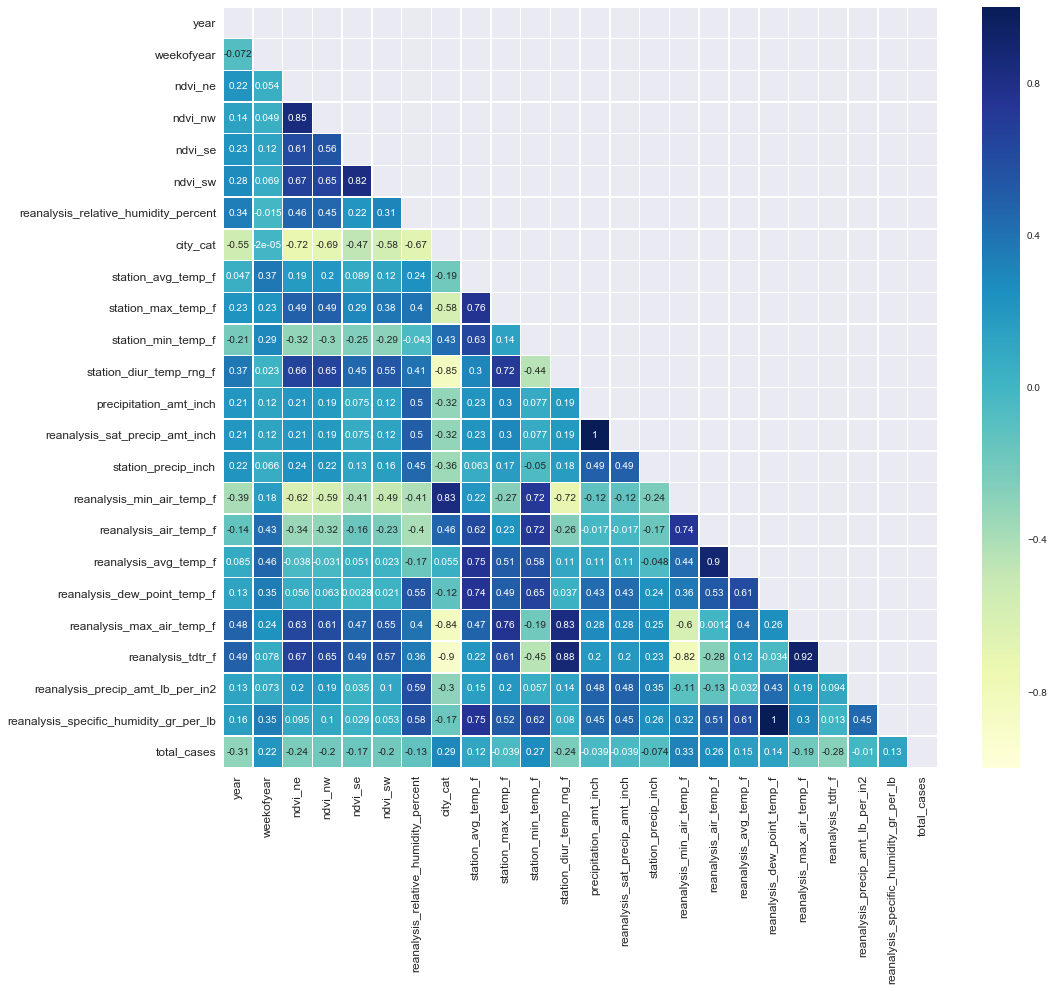

In [40]:
corr = dengue.corr()

fig, ax = plt.subplots(figsize=(16,14))

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

ax = sns.heatmap(corr, mask=mask, ax=ax, annot=True, cmap="YlGnBu",  linewidths=.5)

ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=12)
ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=12)

plt.show()

##### Analysis of Heatmap
<h4>First looking at the heatmap in general, there are some very strong correlations between reanalysis specific humidity and reanalysis of dew point also between reanalysis saturated precipitation amount and preceipitation amount which leads me to believe there is eitehr mutlcolinearity here or these columns are duplicate values. Theses will be examined to determine if either assumption is true. There are others that have high correlations but I need to do more research on exactly what the data means before I can draw further conclusions. That will be flushed out in the EDA and further analysis section if necessary.</h4>
<h4>The target for this project is total cases. There aren't very strong correlations with any feature. Which may work in my favor. Too high of correlation can be due to multicolinarity or that the features share a common identifier in common. At this point, it's too early to start discounting features yet. A few I do know, based on biology and epidemology, is that mosquitos grow the best in warm wets climates and can survive to temperatures  as low as of 40 fahrenheit. So temperature, amount of rain, and in particular amount of rain during certain seasons such as spring and summer should be examined closely.</h4>

In [41]:
# As mentioned above the correlation values aren't very high, but again, that isn't a negative aspect. It can be an inverse
# effect  whichcan be helpful. For example, year is negative but with more analysis and feature engineering year can be very 
# helpful based on the seasons. The other features need to be researched more and it looks like the tenperatures aren't all in
# the same degree. That will have to be rectified and may change the correlation values.
dengue.corr()['total_cases'].sort_values(ascending=False)

total_cases                               1.000000
reanalysis_min_air_temp_f                 0.325252
city_cat                                  0.292624
station_min_temp_f                        0.267109
reanalysis_air_temp_f                     0.264952
weekofyear                                0.216452
reanalysis_avg_temp_f                     0.151637
reanalysis_dew_point_temp_f               0.142531
reanalysis_specific_humidity_gr_per_lb    0.129861
station_avg_temp_f                        0.116109
reanalysis_precip_amt_lb_per_in2         -0.010031
reanalysis_sat_precip_amt_inch           -0.038740
precipitation_amt_inch                   -0.038740
station_max_temp_f                       -0.039219
station_precip_inch                      -0.074374
reanalysis_relative_humidity_percent     -0.132452
ndvi_se                                  -0.168612
reanalysis_max_air_temp_f                -0.191345
ndvi_sw                                  -0.196461
ndvi_nw                        

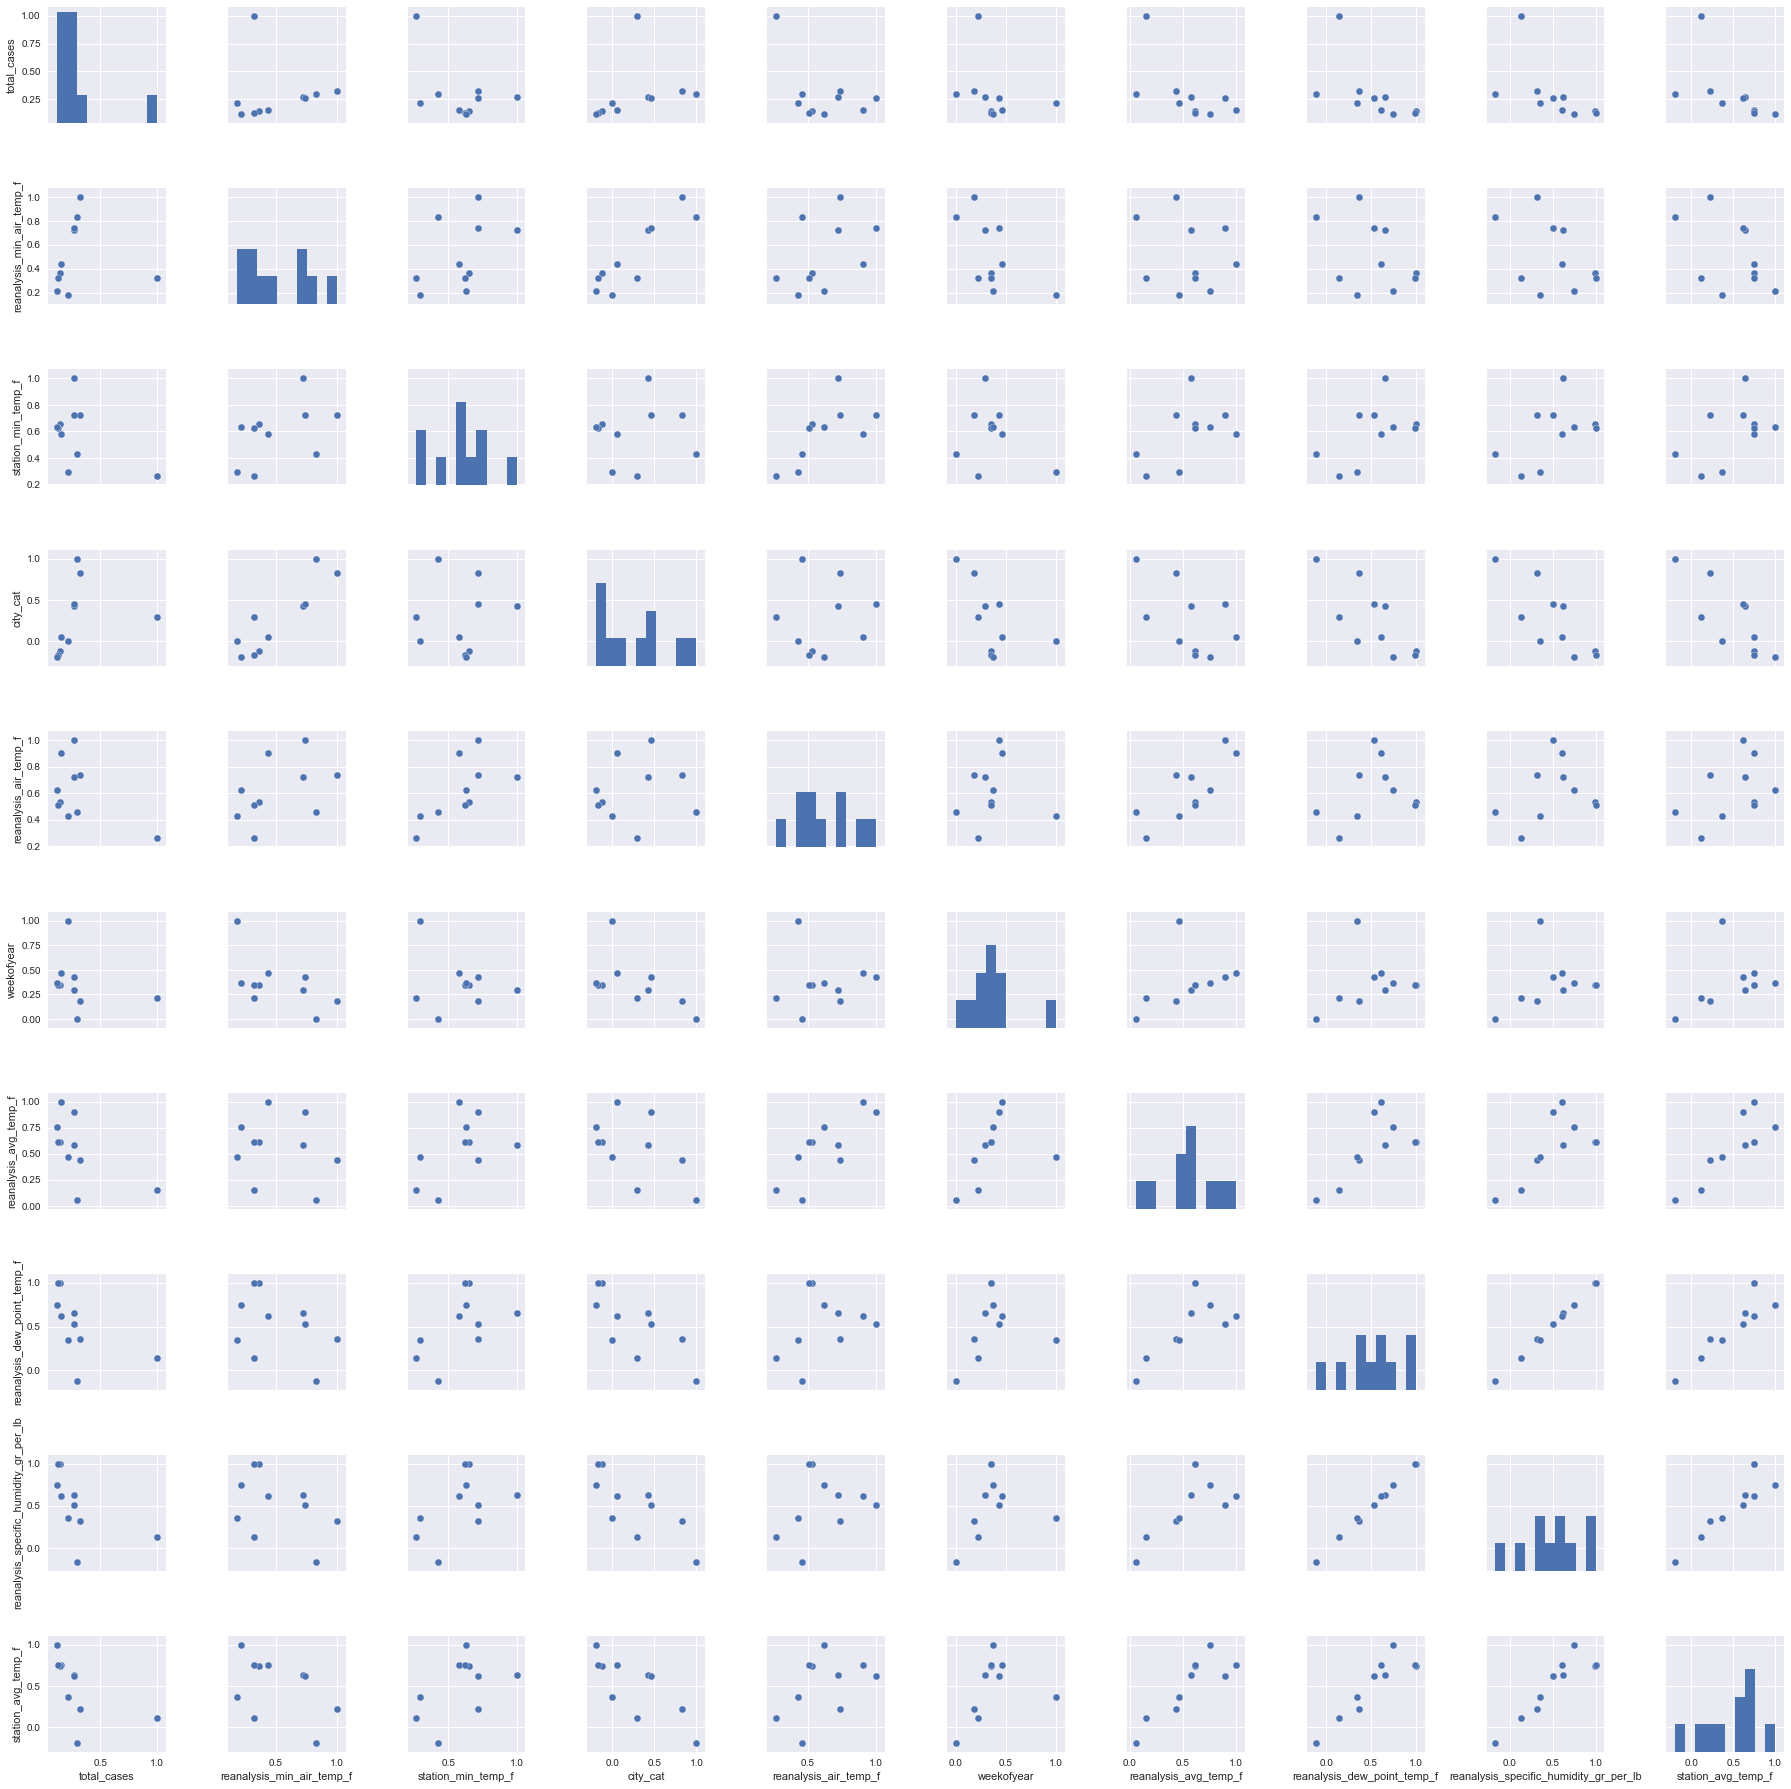

In [42]:
# All the positively correlated values with total cases. There are a few that have very closely fit lines while others are 
# extrememly scattered. Again, I think the graphs will change once the temperature conversations are done.
sns.pairplot(dengue[['total_cases', 'reanalysis_min_air_temp_f','station_min_temp_f','city_cat', 'reanalysis_air_temp_f',
                    'weekofyear', 'reanalysis_avg_temp_f', 'reanalysis_dew_point_temp_f', 
                     'reanalysis_specific_humidity_gr_per_lb','station_avg_temp_f']].corr())
None

In [43]:
# Relative humidity, expressed as a percent, measures the current absolute humidity relative to the maximum (highest point) for 
# that temperature. Specific humidity is the ratio of the mass of water vapor to the total mass of the moist air parcel.This was 
# taken from a website since I was trying to find a correlation between the two features.
# It's hard to compare these two values since they are different units of measure. They are related since they both have to do
# with degree of humidity. There is no clear relationship as a high percentage can have a lower humdity per grain per pound.
# I'm sure there are other factors that effect the humdity such as the amount of rain fall that particular day or the tempertaure
# since humidity usually does have a correlation with high tempertaures and the amount of water vapor in the air.
# I'm not sure how this would relate to mosquito growth. I belive tempertaure and actual amount of rain are better routes to take.
# I'm not going to get rid of the columns but I probably will not be using them as a predictive factor.
dengue[['reanalysis_relative_humidity_percent', 'reanalysis_specific_humidity_gr_per_lb']].head(10)

,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_gr_per_lb
0,73.365714,98.09
1,77.368571,107.61
2,82.052857,117.94
3,80.337143,116.71
4,80.460000,120.47
5,79.891429,120.49
6,82.000000,120.64
7,83.375714,125.84
8,82.768571,124.53
9,81.281429,126.50


In [44]:
# The following are 9 columns that have NaN values for 10 rows. 
nans = dengue[['reanalysis_air_temp_f','reanalysis_avg_temp_f','reanalysis_dew_point_temp_f','reanalysis_max_air_temp_f',
        'reanalysis_min_air_temp_f','reanalysis_precip_amt_lb_per_in2','reanalysis_relative_humidity_percent',
        'reanalysis_specific_humidity_gr_per_lb','reanalysis_tdtr_f']]

In [45]:
nans[nans.isnull().any(axis=1)]

,reanalysis_air_temp_f,reanalysis_avg_temp_f,reanalysis_dew_point_temp_f,reanalysis_max_air_temp_f,reanalysis_min_air_temp_f,reanalysis_precip_amt_lb_per_in2,reanalysis_relative_humidity_percent,reanalysis_specific_humidity_gr_per_lb,reanalysis_tdtr_f
87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
139,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1378,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# These are the rows to be dropped. 
dengue.drop(87, inplace = True)
dengue.drop(139, inplace = True)
dengue.drop(399, inplace = True)
dengue.drop(451, inplace = True)
dengue.drop(711, inplace = True)
dengue.drop(763, inplace = True)
dengue.drop(1118, inplace = True)
dengue.drop(1170, inplace = True)
dengue.drop(1378, inplace = True)
dengue.drop(1430, inplace = True)

##### Analysis of 10 rows of NaN values

I could imputer or at least fillna but I don't see the benefit. I think having 0 would be more determinal to the data then keeping it. The data is spread over multiple years and seasons. I don't know what year or week each indexed row is. In order to accurately imputer the needed information I would have to go by year and week and imputer based on the seasonality. I think there comes a point where the amount of work to create data that for some unknown reason was never recorded becasue specious and a danger to the integrity of the the entire dataset. Due to these reasons I will be dropping these 10 rows.

In [53]:
# There are 189 NaN values. Trying to imputer these would be possible but with so many missing I dont know how accurate I would
# be since these are dependent on seasons and I woudl have to break down the data based on the seasons. I think this is like the 
# the rows that were dropped from before. It would be more harm to just imputer values that may or may not be accurate and yield
# vaild results. Instead I will drop the column. There are three others that have less null values and those I will work on 
# determining how to, the best of my ability, accurately imputer.
dengue.ndvi_ne.isnull().sum()

189

In [54]:
# Dropping column.
dengue.drop('ndvi_ne', axis = 1, inplace = True)

#### Summary of Initial EDA and Further Exploration
*** discuss results from eda and how the data needs to be transformed and what features seem like likely canidates for the next step of the project***

## 4. Preprocessing

#### Train_Test_Split, Scaling, and Baseline

#### Summary of Observations and Next Steps

## 5. Modeling

*** explain what will be done. what models will be used. the new idea about classification modeling***

### 5. a. Regression Model 

#### Summary of Results

### 5. b. Timeseries Model

#### Summary of Results

## 6. Test Data set

#### Test data loaded and analyzed

### 6. a. Modeling

#### Summary of Results

### 6. b. Predictions

#### Summary of Results

### 6. c. Submission

# Capstone Summary: Observations, Discoveries, Pitfalls, and Future Steps